# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv("../data/checker-submits.csv",parse_dates=['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.day_of_week
df

,uid,labname,numTrials,timestamp,hour,dayofweek
0,user_4,project1,1,2020-04-17 05:19:02.744528,5,4
1,user_4,project1,2,2020-04-17 05:22:45.549397,5,4
2,user_4,project1,3,2020-04-17 05:34:24.422370,5,4
3,user_4,project1,4,2020-04-17 05:43:27.773992,5,4
4,user_4,project1,5,2020-04-17 05:46:32.275104,5,4
...,...,...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966,20,3
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900,20,3
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761,20,3
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806,20,3


In [3]:
encoder = OneHotEncoder(sparse_output=False)
encoder

OneHotEncoder(sparse_output=False)

In [4]:
df_transformed = encoder.fit_transform(df[['uid','labname']])
df_transformed

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [5]:
encoded_col = encoder.get_feature_names_out(['uid','labname'])
encoded_col

array(['uid_user_0', 'uid_user_1', 'uid_user_10', 'uid_user_11',
       'uid_user_12', 'uid_user_13', 'uid_user_14', 'uid_user_15',
       'uid_user_16', 'uid_user_17', 'uid_user_18', 'uid_user_19',
       'uid_user_2', 'uid_user_20', 'uid_user_21', 'uid_user_22',
       'uid_user_23', 'uid_user_24', 'uid_user_25', 'uid_user_26',
       'uid_user_27', 'uid_user_28', 'uid_user_29', 'uid_user_3',
       'uid_user_30', 'uid_user_31', 'uid_user_4', 'uid_user_6',
       'uid_user_7', 'uid_user_8', 'labname_code_rvw', 'labname_lab02',
       'labname_lab03', 'labname_lab03s', 'labname_lab05s',
       'labname_laba04', 'labname_laba04s', 'labname_laba05',
       'labname_laba06', 'labname_laba06s', 'labname_project1'],
      dtype=object)

In [6]:
tr_df = pd.DataFrame(df_transformed,columns=encoded_col)
tr_df = pd.concat([df,tr_df],axis=1)
tr_df

,uid,labname,numTrials,timestamp,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,user_4,project1,1,2020-04-17 05:19:02.744528,5,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,user_4,project1,2,2020-04-17 05:22:45.549397,5,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,user_4,project1,3,2020-04-17 05:34:24.422370,5,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,user_4,project1,4,2020-04-17 05:43:27.773992,5,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,user_4,project1,5,2020-04-17 05:46:32.275104,5,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966,20,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900,20,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761,20,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806,20,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
tr_df=tr_df.drop(columns=['uid','labname','timestamp'])
tr_df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
scaler = StandardScaler()
scaler

StandardScaler()

In [9]:
tr_df[['new_hour','new_num']] = scaler.fit_transform(tr_df[['hour','numTrials']])
tr_df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,new_hour,new_num
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.562352,-0.788667
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.562352,-0.756764
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.562352,-0.724861
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.562352,-0.692958
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.562352,-0.661055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.945382,-0.533442
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.945382,-0.629151
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.945382,-0.597248
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.945382,-0.565345


In [10]:
cols = tr_df.columns.tolist()
new_order = cols[-2:] + cols[:-2]
tr_df = tr_df[new_order]
tr_df

,new_hour,new_num,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-2.562352,-0.788667,1,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-2.562352,-0.756764,2,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-2.562352,-0.724861,3,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-2.562352,-0.692958,4,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-2.562352,-0.661055,5,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.945382,-0.533442,9,20,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.945382,-0.629151,6,20,3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.945382,-0.597248,7,20,3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.945382,-0.565345,8,20,3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
def find_accur()->float:
    return ((df.groupby(by='dayofweek').count().max()).iloc[0]) / (df['dayofweek'].count())

find_accur()


0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [12]:
model = LogisticRegression(random_state=21,fit_intercept=False,max_iter=2000)
model

LogisticRegression(fit_intercept=False, max_iter=2000, random_state=21)

In [13]:
y = tr_df['dayofweek']
x_main = tr_df.drop(['dayofweek'],axis=1)
x_main.columns

Index(['new_hour', 'new_num', 'numTrials', 'hour', 'uid_user_0', 'uid_user_1',
       'uid_user_10', 'uid_user_11', 'uid_user_12', 'uid_user_13',
       'uid_user_14', 'uid_user_15', 'uid_user_16', 'uid_user_17',
       'uid_user_18', 'uid_user_19', 'uid_user_2', 'uid_user_20',
       'uid_user_21', 'uid_user_22', 'uid_user_23', 'uid_user_24',
       'uid_user_25', 'uid_user_26', 'uid_user_27', 'uid_user_28',
       'uid_user_29', 'uid_user_3', 'uid_user_30', 'uid_user_31', 'uid_user_4',
       'uid_user_6', 'uid_user_7', 'uid_user_8', 'labname_code_rvw',
       'labname_lab02', 'labname_lab03', 'labname_lab03s', 'labname_lab05s',
       'labname_laba04', 'labname_laba04s', 'labname_laba05', 'labname_laba06',
       'labname_laba06s', 'labname_project1'],
      dtype='object')

In [14]:
model.fit(x_main,y)


LogisticRegression(fit_intercept=False, max_iter=2000, random_state=21)

In [15]:
y_pred = model.predict(x_main)
y_pred

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [16]:
accur2 = accuracy_score(y,y_pred)
accur2

0.641755634638197

In [17]:
model.coef_

array([[ 7.24321942e-02,  1.60425307e-02, -1.10469383e-03,
        -2.91860110e-03,  9.37272245e-01, -6.82478526e-01,
        -1.18836066e+00, -1.25415718e-01,  1.47658593e-01,
        -2.07098165e-01,  1.05443252e+00, -5.35408591e-01,
         9.01523875e-01,  8.39744633e-01,  1.07480280e+00,
        -3.25862316e-01,  6.49090978e-01,  9.73486368e-01,
        -9.99445404e-01,  9.52888734e-01, -8.44433214e-02,
        -1.00965018e+00, -3.94045830e-01, -1.38141547e+00,
        -4.59273487e-01, -1.28507341e+00,  2.12632024e-01,
         1.32478646e+00, -5.43884841e-01,  3.60740769e-01,
         3.90442664e-01,  1.64066043e-01, -1.10616529e-01,
        -6.70689666e-01,  6.58835491e-01,  9.37272245e-01,
         6.85231464e-01,  6.82828325e-01, -2.64847292e-01,
         1.35929125e-01, -4.30774324e-01, -1.70114402e+00,
        -2.92415114e-01, -7.28637284e-01,  2.98127977e-01],
       [-2.40433690e-01, -5.12229569e-02,  1.94054178e-02,
        -2.00071065e-02, -9.78524674e-02, -7.45137545e-

In [18]:



def plot_barh(model,x,top_n = 10):
    impor = np.sum(abs(model.coef_),axis=0)
    x_col = x.columns
    temp_df = pd.DataFrame({'Main_Feature':impor,'Columns':x_col})
    top = temp_df.sort_values(by='Main_Feature')
    top = top[::-1][:top_n]
    top = top[::-1]
    plt.figure(figsize=(12,8))
    plt.barh(y=top['Columns'],width=top['Main_Feature'])
    plt.grid(True)
    plt.title("TOP 10")
    plt.show()
   


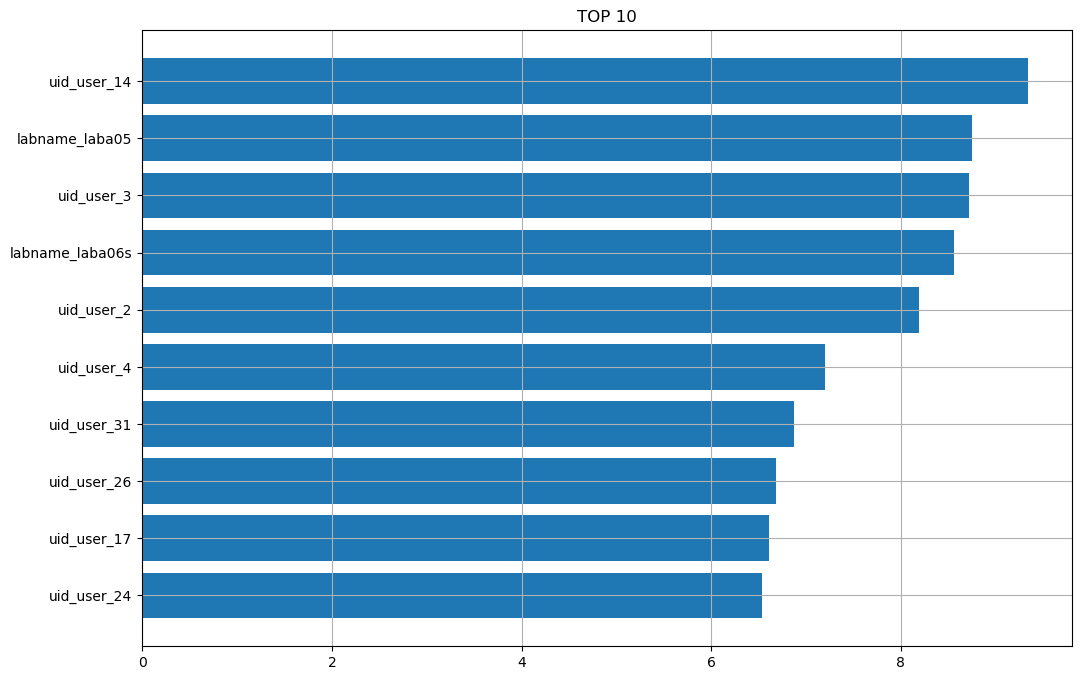

In [19]:
plot_barh(model,x_main)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [20]:

model3 = SVC(probability=True,random_state=21,kernel='linear')
model3

SVC(kernel='linear', probability=True, random_state=21)

In [21]:
model3.fit(x_main,y)

In [ ]:
y_pred_new = model3.predict(x_main)
y_pred_new
accur3 = accuracy_score(y,y_pred_new)
accur3

0.702846975088968

In [ ]:
def func1()->list:
    list1 = ['linear', 'poly', 'rbf', 'sigmoid']
    accur = {}
    for ker in list1:
        model = SVC(probability=True,random_state=21,kernel=ker)
        model.fit(x_main,y)
        y_pred = model.predict(x_main)
        accur[ker]= accuracy_score(y,y_pred)
    return accur
func1()
    

        

{'linear': 0.702846975088968,
 'poly': 0.3398576512455516,
 'rbf': 0.3499406880189798,
 'sigmoid': 0.19750889679715303}

In [ ]:
def plot_barh(model,x,top_n = 10):
    impor = np.sum(abs(model.coef_),axis=0)
    x_col = x.columns
    temp_df = pd.DataFrame({'Main_Feature':impor,'Columns':x_col})
    top = temp_df.sort_values(by='Main_Feature')
    top = top[::-1][:top_n]
    top = top[::-1]
    plt.figure(figsize=(12,8))
    plt.barh(y=top['Columns'],width=top['Main_Feature'])
    plt.grid(True)
    plt.title("TOP 10")
    plt.show()

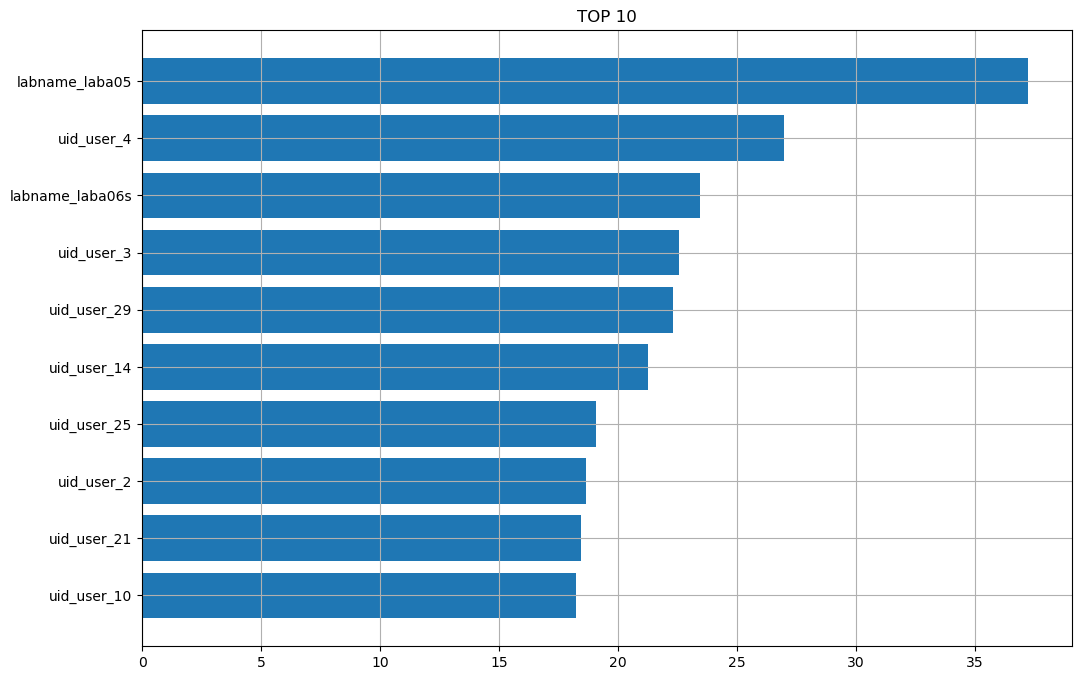

In [ ]:
plot_barh(model3,x_main)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=4,random_state=21)
model_tree

DecisionTreeClassifier(max_depth=4, random_state=21)

In [ ]:
model_tree.fit(x_main,y)
pr_y = model_tree.predict(x_main)
accur_tree = accuracy_score(y,pr_y)
accur_tree

0.5516014234875445

In [ ]:
s = {}
for i in [1,3,4,5,6,7]:
    m_d = DecisionTreeClassifier(max_depth=i,random_state=21)
    m_d.fit(x_main,y)
    p_y = m_d.predict(x_main)
    ac = accuracy_score(y,p_y)
    s[f'Max Depth {i}'] = ac
s

{'Max Depth 1': 0.35765124555160144,
 'Max Depth 3': 0.48991696322657174,
 'Max Depth 4': 0.5516014234875445,
 'Max Depth 5': 0.6109134045077106,
 'Max Depth 6': 0.6637010676156584,
 'Max Depth 7': 0.7064056939501779}

In [ ]:
top_ind_col=np.argsort(model_tree.feature_importances_)[::-1][:10]
top_ind_col

array([44,  1,  8, 41, 16, 10, 27,  3, 43, 39])

In [ ]:
def show_barh(inds,coefs):
	plt.barh(y=[x_main.columns[i] for i in inds], width=[coefs[i] for i in inds])
	plt.title('Top10')
	plt.gca().invert_yaxis()
	plt.grid(True)
	plt.show()

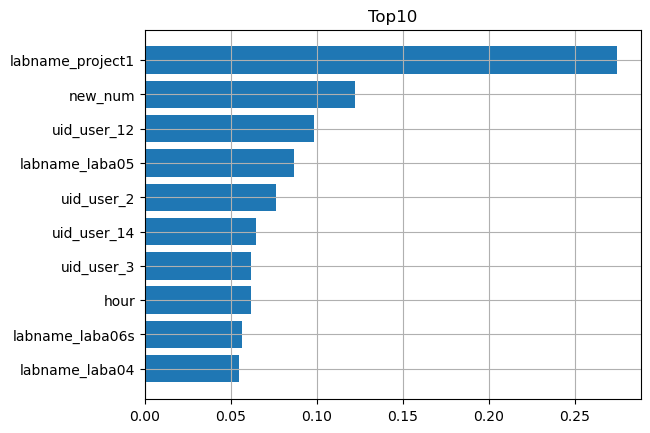

In [ ]:

show_barh(top_ind_col,model_tree.feature_importances_)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [ ]:
model_random_forest = RandomForestClassifier(n_estimators=100,max_depth=25,random_state=21)
model_random_forest

RandomForestClassifier(max_depth=25, random_state=21)

In [ ]:
model_random_forest.fit(x_main,y)
y_pr = model_random_forest.predict(x_main)
accur_random = accuracy_score(y,y_pr)
accur_random

1.0

In [ ]:
s = {}
for i in range(1,25+1,3):
    m_d = RandomForestClassifier(max_depth=i,random_state=21,n_estimators=100)
    m_d.fit(x_main,y)
    p_y = m_d.predict(x_main)
    ac = accuracy_score(y,p_y)
    s[f'Max Depth {i}'] = ac
s

{'Max Depth 1': 0.39501779359430605,
 'Max Depth 4': 0.5486358244365361,
 'Max Depth 7': 0.7485172004744959,
 'Max Depth 10': 0.8938315539739027,
 'Max Depth 13': 0.9590747330960854,
 'Max Depth 16': 0.9869513641755635,
 'Max Depth 19': 0.9988137603795967,
 'Max Depth 22': 0.9994068801897983,
 'Max Depth 25': 1.0}

In [ ]:
top_ind_col_t=np.argsort(model_random_forest.feature_importances_)[::-1][:10]
top_ind_col_t

array([ 2,  1,  3,  0, 44, 10, 41, 23, 16, 27])

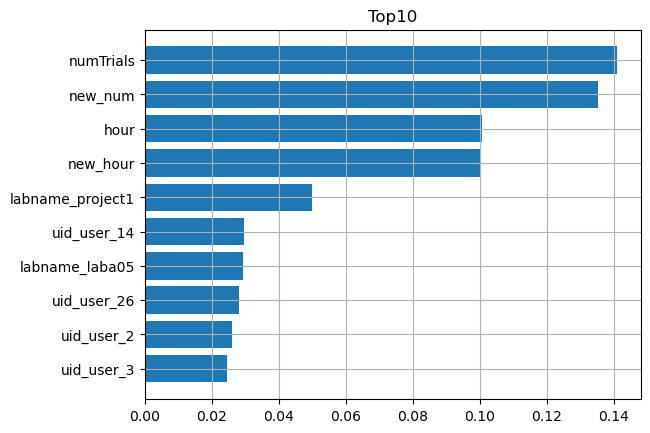

In [ ]:
show_barh(top_ind_col_t,model_random_forest.feature_importances_)